# Case 909
There was a deviation from the SCZ. The captain claimed that it was due to giving way to three vessels entering the SCZ. Therefore, AIS data needs to be checked.

the first step is to filter the relevant time period. Then filter the relevant area of concern (within SCZ). After that we can plot the data to see if there were three vessels entered the SCZ and had potential to intercept with deviated vessel.

## Preliminary Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import csv file to a dataframe
AIS = pd.read_csv("P:/Hong Kong/ENL/PROJECTS/355482 HKIA 3RS ET Services/09 Env Monitoring/02 Impact Data/06 High Speed Ferry/201710/Form B/909/AIS.CSV")

In [3]:
#have an idea on the file
AIS.head()

,date,MMSI,name,hdg,lng,lat,sog,cog
0,2017-10-09T16:00:03.0Z,413906109,YUEGUANGZHOUHUO1332,NaN,113.936560,22.341923,0.0,NaN
1,2017-10-09T16:00:03.0Z,477995877,H.K. UNITED 18,NaN,113.880400,22.319182,0.1,NaN
2,2017-10-09T16:00:04.0Z,477995781,SAMBO DCM 2HO,NaN,113.908147,22.328537,0.0,NaN
3,2017-10-09T16:00:04.0Z,477995899,KAT YUE 8,NaN,113.898173,22.314840,0.0,NaN
4,2017-10-09T16:00:04.0Z,477995402,WING HOP LEE NO 12,NaN,113.878747,22.322318,0.1,NaN


In [4]:
#filter rows with name = "SHOPPES COTAICENTRAL" in order to get the relevant range of time
SHOPPES_COTAICENTRAL = AIS[AIS['name']== "SHOPPES COTAICENTRAL"]

In [5]:
#look at the data
SHOPPES_COTAICENTRAL.head()

,date,MMSI,name,hdg,lng,lat,sog,cog
13413,2017-10-09T16:39:49.0Z,477937500,SHOPPES COTAICENTRAL,57.0,NaN,NaN,38.599998,57.500000
172438,2017-10-10T00:52:29.0Z,477937500,SHOPPES COTAICENTRAL,239.0,NaN,NaN,33.599998,243.100006
172657,2017-10-10T00:53:16.0Z,477937500,SHOPPES COTAICENTRAL,225.0,NaN,NaN,37.400002,226.800003
214578,2017-10-10T03:10:19.0Z,477937500,SHOPPES COTAICENTRAL,81.0,NaN,NaN,80.500000,79.599998
214630,2017-10-10T03:10:25.0Z,477937500,SHOPPES COTAICENTRAL,81.0,NaN,NaN,33.500000,81.000000


In [6]:
#drop rows with no lat value
SHOPPES_COTAICENTRAL = SHOPPES_COTAICENTRAL[pd.notnull(SHOPPES_COTAICENTRAL['lat'])]

In [7]:
#have a look at the data to check whether NA has been dropped
SHOPPES_COTAICENTRAL.head()

,date,MMSI,name,hdg,lng,lat,sog,cog
345065,2017-10-10T10:34:37.0Z,477937500,SHOPPES COTAICENTRAL,264.0,113.974397,22.351003,39.000000,263.899994
345094,2017-10-10T10:34:44.0Z,477937500,SHOPPES COTAICENTRAL,263.0,113.973173,22.350913,39.000000,265.000000
345121,2017-10-10T10:34:48.0Z,477937500,SHOPPES COTAICENTRAL,263.0,113.972413,22.350857,39.099998,265.200012
345136,2017-10-10T10:34:51.0Z,477937500,SHOPPES COTAICENTRAL,262.0,113.971628,22.350790,39.099998,265.000000
345157,2017-10-10T10:34:55.0Z,477937500,SHOPPES COTAICENTRAL,261.0,113.970883,22.350722,39.200001,264.799988


In [8]:
#get the earliest relevant time
begin = SHOPPES_COTAICENTRAL.iloc[0,0]

In [9]:
begin

'2017-10-10T10:34:37.0Z'

In [10]:
#get the latest relevant time
end = SHOPPES_COTAICENTRAL.iloc[382,0]

In [11]:
end

'2017-10-10T11:36:21.0Z'

In [12]:
#filter out all ships between the earlies relevant time and latest relevant time
ships_between_beginEnd = AIS[(AIS['date'] >= begin) & (AIS['date']<= end )]

In [13]:
#have a look on all the ships' data with the above timeframe
ships_between_beginEnd.head()

,date,MMSI,name,hdg,lng,lat,sog,cog
345063,2017-10-10T10:34:37.0Z,477995654,PLEASURE TIME 2,NaN,113.930800,22.338293,10.200000,45.799999
345064,2017-10-10T10:34:37.0Z,413906934,YUEHUIZHOUHUO168,NaN,113.887547,22.321875,0.000000,NaN
345065,2017-10-10T10:34:37.0Z,477937500,SHOPPES COTAICENTRAL,264.0,113.974397,22.351003,39.000000,263.899994
345066,2017-10-10T10:34:38.0Z,412882000,SHUN JING,NaN,113.926658,22.360805,28.799999,301.799988
345067,2017-10-10T10:34:38.0Z,477995816,NEW SUN,NaN,113.910410,22.332953,0.000000,216.800003


In [14]:
#drop rows with no lat value
ships_between_beginEnd_filtered = ships_between_beginEnd[pd.notnull(ships_between_beginEnd['lat'])]

In [15]:
#check whether Na has dropped
ships_between_beginEnd_filtered.head()

,date,MMSI,name,hdg,lng,lat,sog,cog
345063,2017-10-10T10:34:37.0Z,477995654,PLEASURE TIME 2,NaN,113.930800,22.338293,10.200000,45.799999
345064,2017-10-10T10:34:37.0Z,413906934,YUEHUIZHOUHUO168,NaN,113.887547,22.321875,0.000000,NaN
345065,2017-10-10T10:34:37.0Z,477937500,SHOPPES COTAICENTRAL,264.0,113.974397,22.351003,39.000000,263.899994
345066,2017-10-10T10:34:38.0Z,412882000,SHUN JING,NaN,113.926658,22.360805,28.799999,301.799988
345067,2017-10-10T10:34:38.0Z,477995816,NEW SUN,NaN,113.910410,22.332953,0.000000,216.800003


## Filter relevant area of concern

There are still 11907 rows of data after filtering the time. We need to further narrow down our search to the relevant space.

I have defined the polygon boundary for other cases before. So I just reuse them. If it is too complicated, it is OK to define a rectangle instead of polygon boundary.

In [16]:
#a function to calculate slope and intercept given two points
def slope_intercept (point_1, point_2):
    try:
        slope = (point_1[0] - point_2[0])/(point_1[1] - point_2[1])
        intercept = point_1[0] - slope * point_1[1]
    except:
        slope = "infinite"
        intercept = "infinite"
    
    return slope, intercept

First we define 7 points by LAT and LON. We,then,defined 8 boundary (Which is more than 6, please refer to reference figure for explanation). We, then, use the ineqaulity equation, to define whether a ship has not entered the zone.

In [17]:
 #define boundary line
A = (22.37751667 , 113.9022667) #LAT (Y), LON (X)
B = (22.37335 , 113.9022667)
C = (22.37335 , 113.8982667)
D = (22.38998333 , 113.8850833)
E = (22.38996667 , 113.8691167)
F = (22.39665 , 113.8691167)
G = (22.39668333 , 113.8883333)

def B_1 (LAT, LON): #becoz it is vertical or nearly vertical, we have three cases
    slope, intercept = slope_intercept(F, E)
    if slope == "infinite":
        if LON > F[1]:
            return True
    elif slope > 0:
        if LAT - slope * LON - intercept < 0:
            return True
    elif slope < 0:
        if LAT - slope * LON - intercept > 0:
            return True

def B_2 (LAT, LON):
    slope, intercept = slope_intercept(F, G) #becoz it is nearly a horizontal line. slope doesnt matter
    if LAT - slope * LON - intercept > 0:
        return True

def B_3_left (LAT): #it is a vertical line
    if  LAT  < G[1]:
        return True

def B_3_right (LAT): #it is a vertical line
    if  LAT  > G[1]:
        return True

def B_4 (LAT, LON): #becoz it is nearly a horizontal line. slope doesnt matter
    slope, intercept = slope_intercept(C, B)
    if LAT - slope * LON - intercept > 0:
        return True

def B_5 (LAT, LON): #becoz it is nearly a horizontal line. slope doesnt matter
    slope, intercept = slope_intercept(E, D)
    if LAT - slope * LON - intercept < 0:
        return True

def B_6 (LAT, LON): #it is clearly a negative slope line
    slope, intercept = slope_intercept(D, C)
    if LAT - slope * LON - intercept < 0:
        return True

def B_7 (LAT, LON): #becoz it is vertical or nearly vertical, we have three cases
    slope, intercept = slope_intercept(A, B)
    if slope == "infinite":
        if LON > A[1]:
            return True
    elif slope > 0:
        if LAT - slope * LON - intercept < 0:
            return True
    elif slope < 0:
        if LAT - slope * LON - intercept > 0:
            return True

def B_8 (LAT, LON): #clearly have negative slope
    slope, intercept = slope_intercept(A, G) 
    if LAT - slope * LON - intercept > 0:
        return True

In [18]:
#defined not traveling through the zone
def check_devaiation_notInZone(LAT, LON):

    #initialize boundary value and deviation value as false
    B1 = False
    B2 = False
    B3_left = False
    B3_right = False
    B4 = False
    B5 = False
    B6 = False
    B7 = False
    B8 = False
    deviation = False
    
    #check passing boundary line
    B1 = B_1 (LAT, LON)
        
    B2 = B_2 (LAT, LON)
        
    B3_left = B_3_left (LON)

    B3_right = B_3_right (LON)

    B4 = B_4 (LAT, LON)
        
    B5 = B_5 (LAT, LON)
        
    B6 = B_6 (LAT, LON)
        
    B7 = B_7 (LAT, LON)
        
    B8 = B_8 (LAT, LON)
    
    #check deviation
    if B1 == True and B2 == True and B3_left == True: #deviation in area 1
        deviation = True

    if B1 == True and B4 == True and B5 == True and B6 == True: #deviation in area 2
        deviation = True

    if B3_right == True and B4 == True: #deviation in area 3
        if B7 == True or B8 == True:
            deviation = True
    
    return deviation


In [19]:
#define enter the SCZ
def enteredZone (LAT, LON):
    B1 = False
    B4 = False
    
    #check passing boundary line
    B1 = B_1 (LAT, LON)

    B4 = B_4 (LAT, LON)
        
    
    if B1 == True  and B4 == True and check_devaiation_notInZone(LAT, LON) == False:
        return True
    else:
        return False

### Filter all ships that have entered the SCZ

In [20]:
ships_between_beginEnd_filtered['enteredZone'] = ships_between_beginEnd_filtered.apply(lambda row: enteredZone(row['lat'], row['lng']), axis = 1)

C:\Users\CHA82870\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
FinalData = ships_between_beginEnd_filtered[ships_between_beginEnd_filtered['enteredZone'] == True]

In [22]:
FinalData.head()

,date,MMSI,name,hdg,lng,lat,sog,cog,enteredZone
346382,2017-10-10T10:38:50.0Z,412882000,SHUN JING,NaN,113.898748,22.381967,28.799999,314.299988,True
346428,2017-10-10T10:38:59.0Z,412882000,SHUN JING,NaN,113.897922,22.382718,28.799999,314.799988,True
346441,2017-10-10T10:39:02.0Z,412882000,SHUN JING,NaN,113.897725,22.382908,28.700001,315.100006,True
346451,2017-10-10T10:39:03.0Z,412882000,SHUN JING,NaN,113.897530,22.383095,28.700001,315.500000,True
346469,2017-10-10T10:39:06.0Z,412882000,SHUN JING,NaN,113.897130,22.383480,28.700001,315.399994,True


### Now we only have 291 rows of data. We got 11907 before filtering space

In [23]:
#list out the name of ships entered the SCZ
name = FinalData.name.unique()

In [24]:
name

array(['SHUN JING           ', nan, 'JIN ZHU HU          ',
       'SHOPPES COTAICENTRAL', 'OOCL GUANGZHOU', 'KMTC ULSAN          ',
       'YIU LIAN 6', 'PILOT11             ', 'PILOT10             '], dtype=object)

### I am getting data for a particular ship

In [25]:
shun_jing = FinalData[FinalData['name'] == 'SHUN JING           ']

In [26]:
jin_zhu_hu = FinalData[FinalData['name'] == 'JIN ZHU HU          ']

In [27]:
SHOPPES_COTAICENTRAL = FinalData[FinalData['name'] == 'SHOPPES COTAICENTRAL']

In [28]:
OOCL_GUANGZHOU = FinalData[FinalData['name'] == 'OOCL GUANGZHOU']

In [29]:
KMTC_ULSAN = FinalData[FinalData['name'] == 'KMTC ULSAN          ']

In [30]:
YIU_LIAN_6 = FinalData[FinalData['name'] == 'YIU LIAN 6']

In [31]:
pilot11 = FinalData[FinalData['name'] == 'PILOT11             ']

In [32]:
pilot10 = FinalData[FinalData['name'] == 'PILOT10             ']

In [33]:
plt.scatter(shun_jing['lng'],shun_jing['lat'], label = 'shun_jing')
plt.scatter(jin_zhu_hu['lng'],jin_zhu_hu['lat'], label = 'jin_zhu_hu')
plt.scatter(OOCL_GUANGZHOU['lng'],OOCL_GUANGZHOU['lat'], label = 'OOCL_GuangZhou')
plt.scatter(KMTC_ULSAN['lng'],KMTC_ULSAN['lat'], label = 'KMTC_ULSCAN')
plt.scatter(YIU_LIAN_6['lng'],YIU_LIAN_6['lat'], label = 'Yiu_Lian_6')
plt.scatter(SHOPPES_COTAICENTRAL['lng'],SHOPPES_COTAICENTRAL['lat'], label = 'SHOPPES_COTAICENTRAL')
plt.xlabel('lng')
plt.ylabel('lat')
plt.legend()

# Analysis

The below graph shows that OOCL, Shun Jing, KMTC, Jin Zhu Hu have the potential to intersect with Shoppes Cotai Central

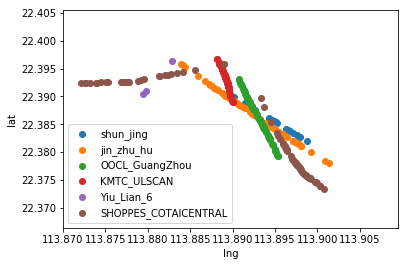

In [34]:
plt.show()

### The above graph shows data within a cetain period of time. It is possible that the intersecting ships occur before or after Shoppes Contai Central passed by. We need to further analysz the data by ploting lng agains time

In [35]:
from datetime import datetime
from dateutil.parser import parse

In [36]:
#converting messy date in the original files to correct format
shun_jing['datetime'] = pd.to_datetime(shun_jing['date'])
jin_zhu_hu['datetime'] = pd.to_datetime(jin_zhu_hu['date'])
OOCL_GUANGZHOU['datetime'] = pd.to_datetime(OOCL_GUANGZHOU['date'])
KMTC_ULSAN['datetime'] = pd.to_datetime(KMTC_ULSAN['date'])
YIU_LIAN_6['datetime'] = pd.to_datetime(YIU_LIAN_6['date'])
SHOPPES_COTAICENTRAL['datetime'] = pd.to_datetime(SHOPPES_COTAICENTRAL['date'])


C:\Users\CHA82870\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\CHA82870\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\CHA82870\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [37]:
plt.plot(shun_jing['datetime'],shun_jing['lng'], label = 'shun_jing')
plt.plot(jin_zhu_hu['datetime'],jin_zhu_hu['lng'], label = 'jin_zhu_hu')
plt.plot(OOCL_GUANGZHOU['datetime'],OOCL_GUANGZHOU['lng'], label = 'OOCL_GuangZhou')
plt.plot(KMTC_ULSAN['datetime'],KMTC_ULSAN['lng'], label = 'KMTC_ULSCAN')
plt.plot(YIU_LIAN_6['datetime'],YIU_LIAN_6['lng'], label = 'Yiu_Lian_6')
plt.plot(SHOPPES_COTAICENTRAL['datetime'],SHOPPES_COTAICENTRAL['lng'], label = 'SHOPPES_COTAICENTRAL')
plt.xlabel('Time')
plt.ylabel('lng')
plt.legend()

### The below graph shows that OOCL, KMTC, and Yiu did intersect with the course of Shoppes Contai Central from around 10:11:12 to 10:11:32.

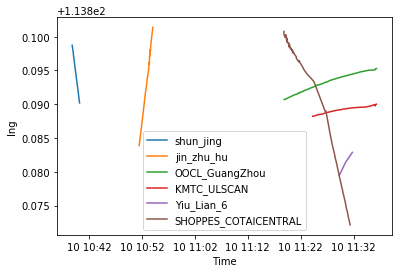

In [38]:
plt.show()

## Therefore, captain explanation is accepted.